In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from IPython.display import display
from sklearn.model_selection import train_test_split

In [8]:
!tree -dL 2 data/aclImdb

data/aclImdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    ├── pos
    └── unsup

7 directories


In [9]:
!rm -r data/aclImdb/train/unsup

In [10]:
#訓練データを読み込む
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
#load_filesは一連の訓練テキストと訓練ラベルを返す
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [11]:
# <br />を取り除く
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [14]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


In [15]:
#テストデータセットのロード
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount((y_test))))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


### Bag of Words

- 章立て、パラグラフ、文章、フォーマットなどの入力テキストのもつ構造のほとんどすべてが失われ、単語がテキストに現れる回数だけが数えられる
- テキストを袋（Bag）に見立て、そこに単語が入っている、というイメージ
- 文章の集合であるコーパスに対してBoW表現を計算するには3ステップ必要
    - トークン分割（Tokenization） 個々の文書を単語（トークンと呼ぶ）に分割する
    - ボキャブラリ構築（Vocabulary building）　すべての文章に現れるすべての単語をボキャブラリとして集め、番号をつける
    - エンコード 　個々の文書に対して、ボキャブラリが現れる回数を数える

#### トイデータセットに対するBoW

In [20]:
bards_words = ['The fool doth think he is wise,',
              'but the wise man knows himself to be a fool']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [22]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content: {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content: {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [23]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


- BoW表現は、SciPyの疎行列として格納されている
- このデータ構造は非ゼロの要素しか格納しない
- この行列は2*13で、2つのデータポイントに対してそれぞれ行が割り当てられ、ボキャブラリ中の単語に対してそれぞれ特徴量が割り当てられている
- 疎行列になっているのは、ほとんどの文書にはボキャブラリ中の単語のごく一部しか用いられず、特徴量に対する要素のほとんどが0になるから
- この状態はメモリの無駄なので、密なNumpy行列に変換する

In [24]:
print("Dense representation of bag_of_words: \n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words: 
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [25]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


- ボキャブラリは74849単語で構成されている

In [26]:
#ボキャブラリを見てみる
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 Features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 Features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [29]:
# モデルを構築してみる
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation sore: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation sore: 0.89
Best parameters:  {'C': 0.1}


In [32]:
X_test = vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test, y_test)))

0.88


- 単語の抽出を改善したい
- 数字のようなあまり意味のないトークンが大量に出されてしまう
- 5つ以上の文書に登場するトークンのみに絞って見る

In [33]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df:{}".format(repr(X_train)))

X_train with min_df:<25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [34]:
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature: \n{}".format(feature_names[::70]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature: 
['00', '1909', '1975', '34', '7th', 'ably', 'acceptance', 'acknowledges', 'addictive', 'adoring', 'affections', 'agile', 'aj', 'alienates', 'alphabet', 'ambush', 'analogy', 'angus', 'anthem', 'apocalyptic', 'appropriately', 'arguing', 'arson', 'ass', 'astral', 'attitudes', 'authors', 'awesome', 'backstory', 'balloons', 'barbr

In [35]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation sore: {:.2f}".format(grid.best_score_))

Best cross-validation sore: 0.89


- 精度は変わらないが、予測に必要な変数を削れたことには意味がある

### ストップワード

- 役に立たない単語を取り除くもう一つの方法として、あまりに頻出するため役に立たない単語を捨てる方法がある
- 言語固有のストップワードを使う方法と、頻度の高い単語を捨てる方法がある

In [38]:
# ストップワードを見て見る
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['are', 'towards', 'i', 'those', 'no', 'detail', 'somewhere', 'forty', 'co', 'thereafter', 'formerly', 'someone', 'others', 'thus', 'only', 'mine', 'almost', 'about', 'ie', 'must', 'thence', 'yourselves', 'an', 'after', 'can', 'interest', 'while', 'side', 'us', 'onto', 'on', 'whenever']


In [40]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [41]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation sore: {:.2f}".format(grid.best_score_))

Best cross-validation sore: 0.88


## トピックモデリングと文書クラスタリング

## LDA(Latent Dirchlet Allocation)

- LDAは同時に現れる頻度の高い単語の集合（トピック）を探す
- 機械学習モデルで言う所の「トピック」は、PCAやNMFの成分に近く、解釈できる意味を持つかもしれないし持たないかもしれない
- トピックモデリングは教師なし学習となるので、一般的な単語が解析に影響を与えすぎないように、取り除いたほうが良いとされる

In [43]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [47]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch", max_iter=25, random_state=0)
#ここでは、モデルの構築と変換を一度に行う
# 変換には時間がかかるが、同時に行うことで時間を節約することができる
document_topics = lda.fit_transform(X)

In [48]:
lda.components_.shape

(10, 10000)

In [49]:
#トピックの意味を理解するために、それぞれのトピックについて重要な単語を見てみる

#それぞれのトピック（compenents_の行）に対して、特徴量を昇順でソート
#ソートを降順にするために[:, ::-1]で行を反転
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# vectorizerから特徴量を取得
feature_names = np.array(vect.get_feature_names())

In [50]:
#最初の10トピックを表示
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [51]:
# 100トピックでモデルを作ってみる
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch", max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [52]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

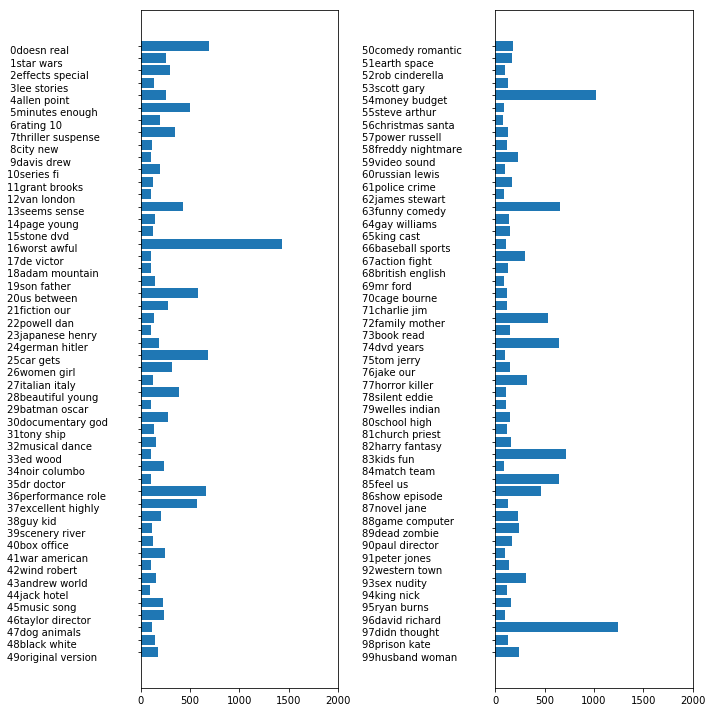

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words)
                          for i, words in enumerate(feature_names[sorting[:, :2]])]
#２カラムの棒グラフ
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()